In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import * 

In [4]:
df = pd.read_csv("/data/credit-default.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [5]:
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


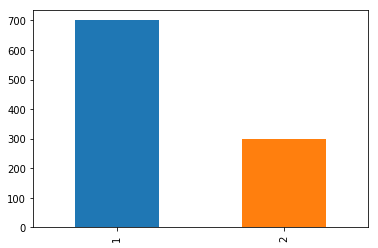

In [6]:
df.default.value_counts().plot.bar()

In [8]:
target = "default"
y = np.where(df.default == 2, 1, 0)
X = df.copy()
del X[target]

X_dummy = pd.get_dummies(X)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_dummy,
                            y, test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("poly", preprocessing.PolynomialFeatures(degree = 2, include_bias=False)),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)



Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('est', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [10]:
y_test_pred = pipe.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.7

In [12]:
from mlxtend.plotting import plot_confusion_matrix

(<matplotlib.figure.Figure at 0x10cd520b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a15801240>)

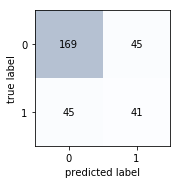

In [13]:
 plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<matplotlib.figure.Figure at 0x1a1d5453c8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1d545a20>)

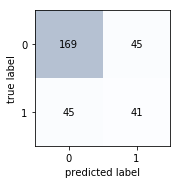

In [16]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<matplotlib.figure.Figure at 0x1a15099668>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1592f5f8>)

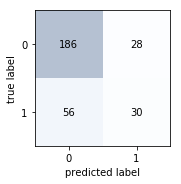

In [17]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.8, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

(<matplotlib.figure.Figure at 0x1a1592f588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a155de940>)

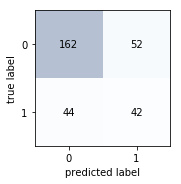

In [18]:
y_test_prob = pipe.predict_proba(X_test)[:, 1]
y_test_pred = np.where(y_test_prob>0.3, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))